In [27]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../train.csv', index_col='id', sep=',')
df_test = pd.read_csv('../test.csv', index_col='id', sep=',')

df_new=df
print(df.shape)
df

(15000, 18)


Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
id                                                                             
0      639.0       25.0      0.50     0.25     0.75   0.63              94.6   
1      124.0       12.5      0.25     0.25     0.25   0.25              77.4   
2      485.0       25.0      0.50     0.25     0.38   0.75              94.6   
3      324.0       12.5      0.25     0.25     0.75   0.75              94.6   
4      235.0       12.5      0.25     0.25     0.50   0.63              77.4   
...      ...        ...       ...      ...      ...    ...               ...   
14995  258.0       12.5      0.25     0.25     0.50   0.63              69.7   
14996  256.0       12.5      0.25     0.25     0.38   0.63              77.4   
14997  324.0       12.5      0.25     0.25     0.75   0.50              77.4   
14998  691.0       25.0      0.50     0.38     0.38   0.75              86.0   
14999  253.0       12.5      0.25     0.25     0.50   0.75              86.0   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
id                                                                
0                  57.2                  79.0              68.2   
1                  46.8                  64.7              55.8   
2                  57.2                  79.0              68.2   
3                  57.2                  79.0              68.2   
4                  46.8                  64.7              55.8   
...                 ...                   ...               ...   
14995              42.1                  58.2              50.2   
14996              46.8                  64.7              55.8   
14997              46.8                  64.7              55.8   
14998              52.0                  71.9              62.0   
14999              52.0                  71.9              62.0   

       MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
id                                                           
0                  33.0                  55.9         34.0   
1                  27.0                  45.8         34.0   
2                  33.0                  55.9         24.0   
3                  33.0                  55.9         16.0   
4                  27.0                  45.8         24.0   
...                 ...                   ...          ...   
14995              24.3                  41.2         34.0   
14996              27.0                  45.8         34.0   
14997              27.0                  45.8         16.0   
14998              30.0                  50.8          1.0   
14999              30.0                  50.8          1.0   

       AverageRainingDays  fruitset  fruitmass      seeds       yield  
id                                                                     
0                    0.56  0.402948   0.409261  31.274591  4418.44126  
1                    0.56  0.500438   0.445494  34.467567  5862.80545  
2                    0.39  0.509001   0.459421  36.624966  6079.08526  
3                    0.26  0.583379   0.498056  40.865478  7400.77538  
4                    0.39  0.447669   0.423764  33.298861  4858.24073  
...                   ...       ...        ...        ...         ...  
14995                0.56  0.335927   0.352186  28.793440  3182.69865  
14996                0.56  0.545095   0.470719  38.042756  5862.80545  
14997                0.26  0.481801   0.442535  35.414082  5569.13925  
14998                0.10  0.552359   0.470847  38.625436  6795.88187  
14999                0.10  0.523846   0.464067  37.758138  6526.98819  

[15000 rows x 18 columns]

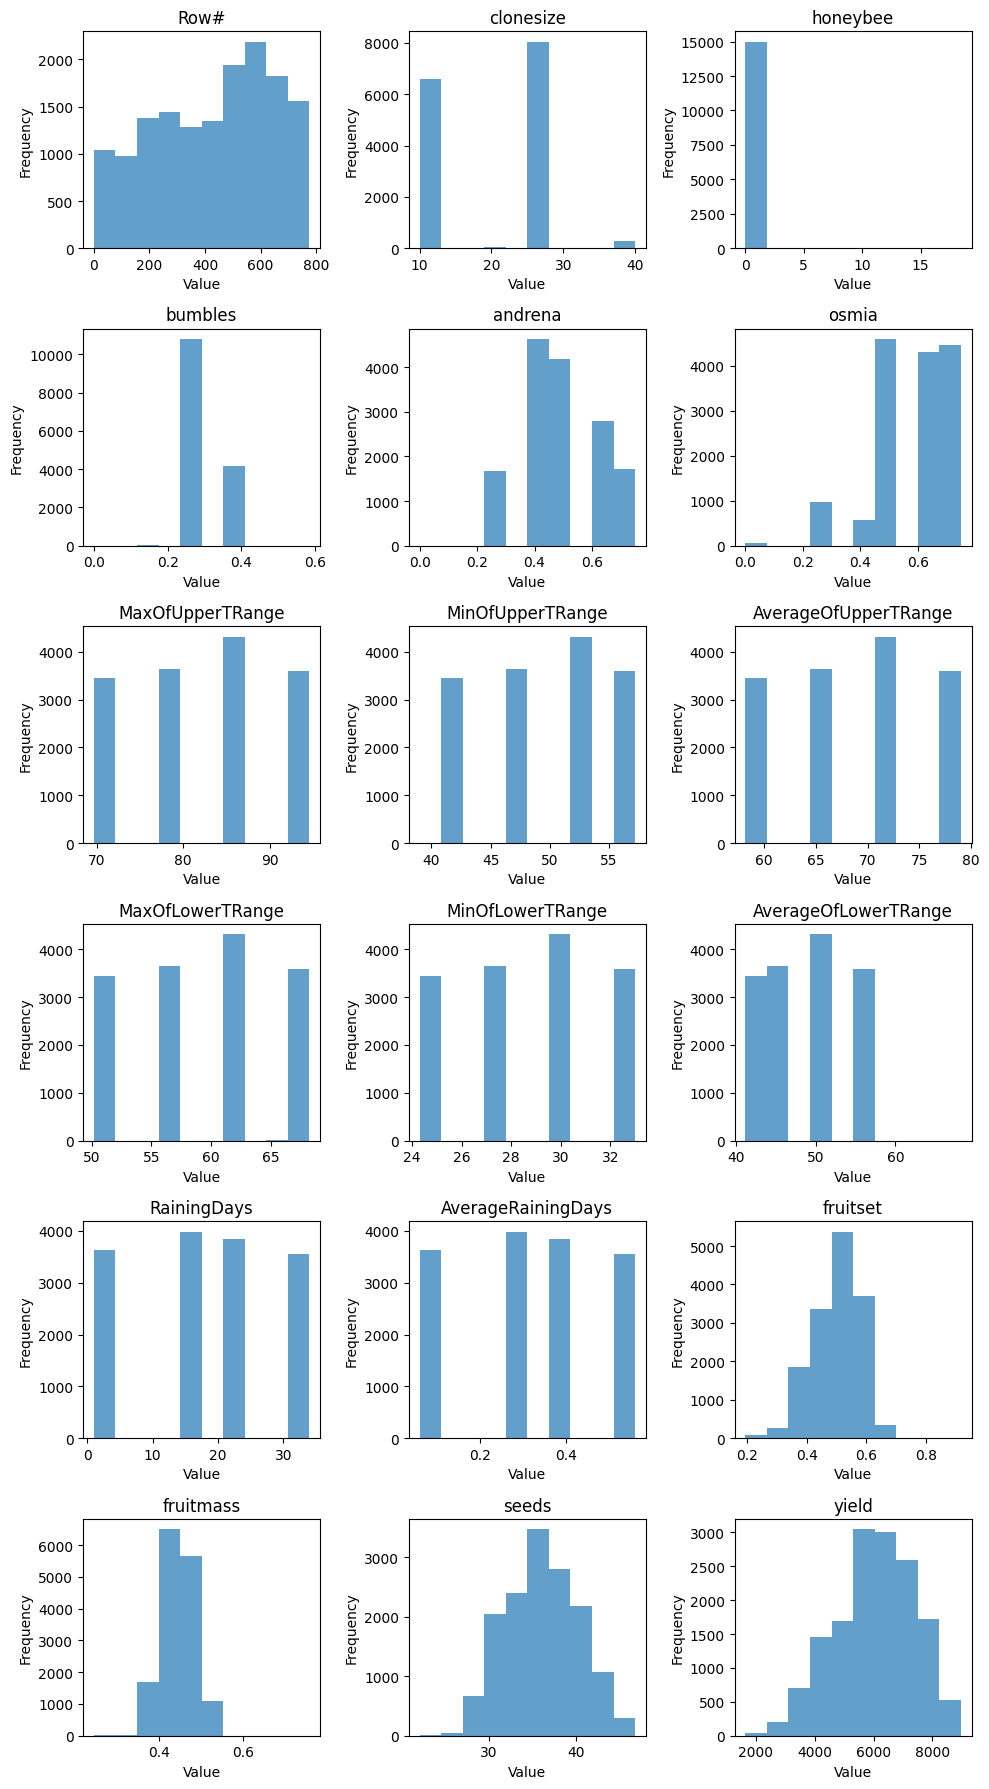

In [16]:
# Set the number of rows and columns for subplots
num_features = len(df.columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 3))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and plot
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=10, alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

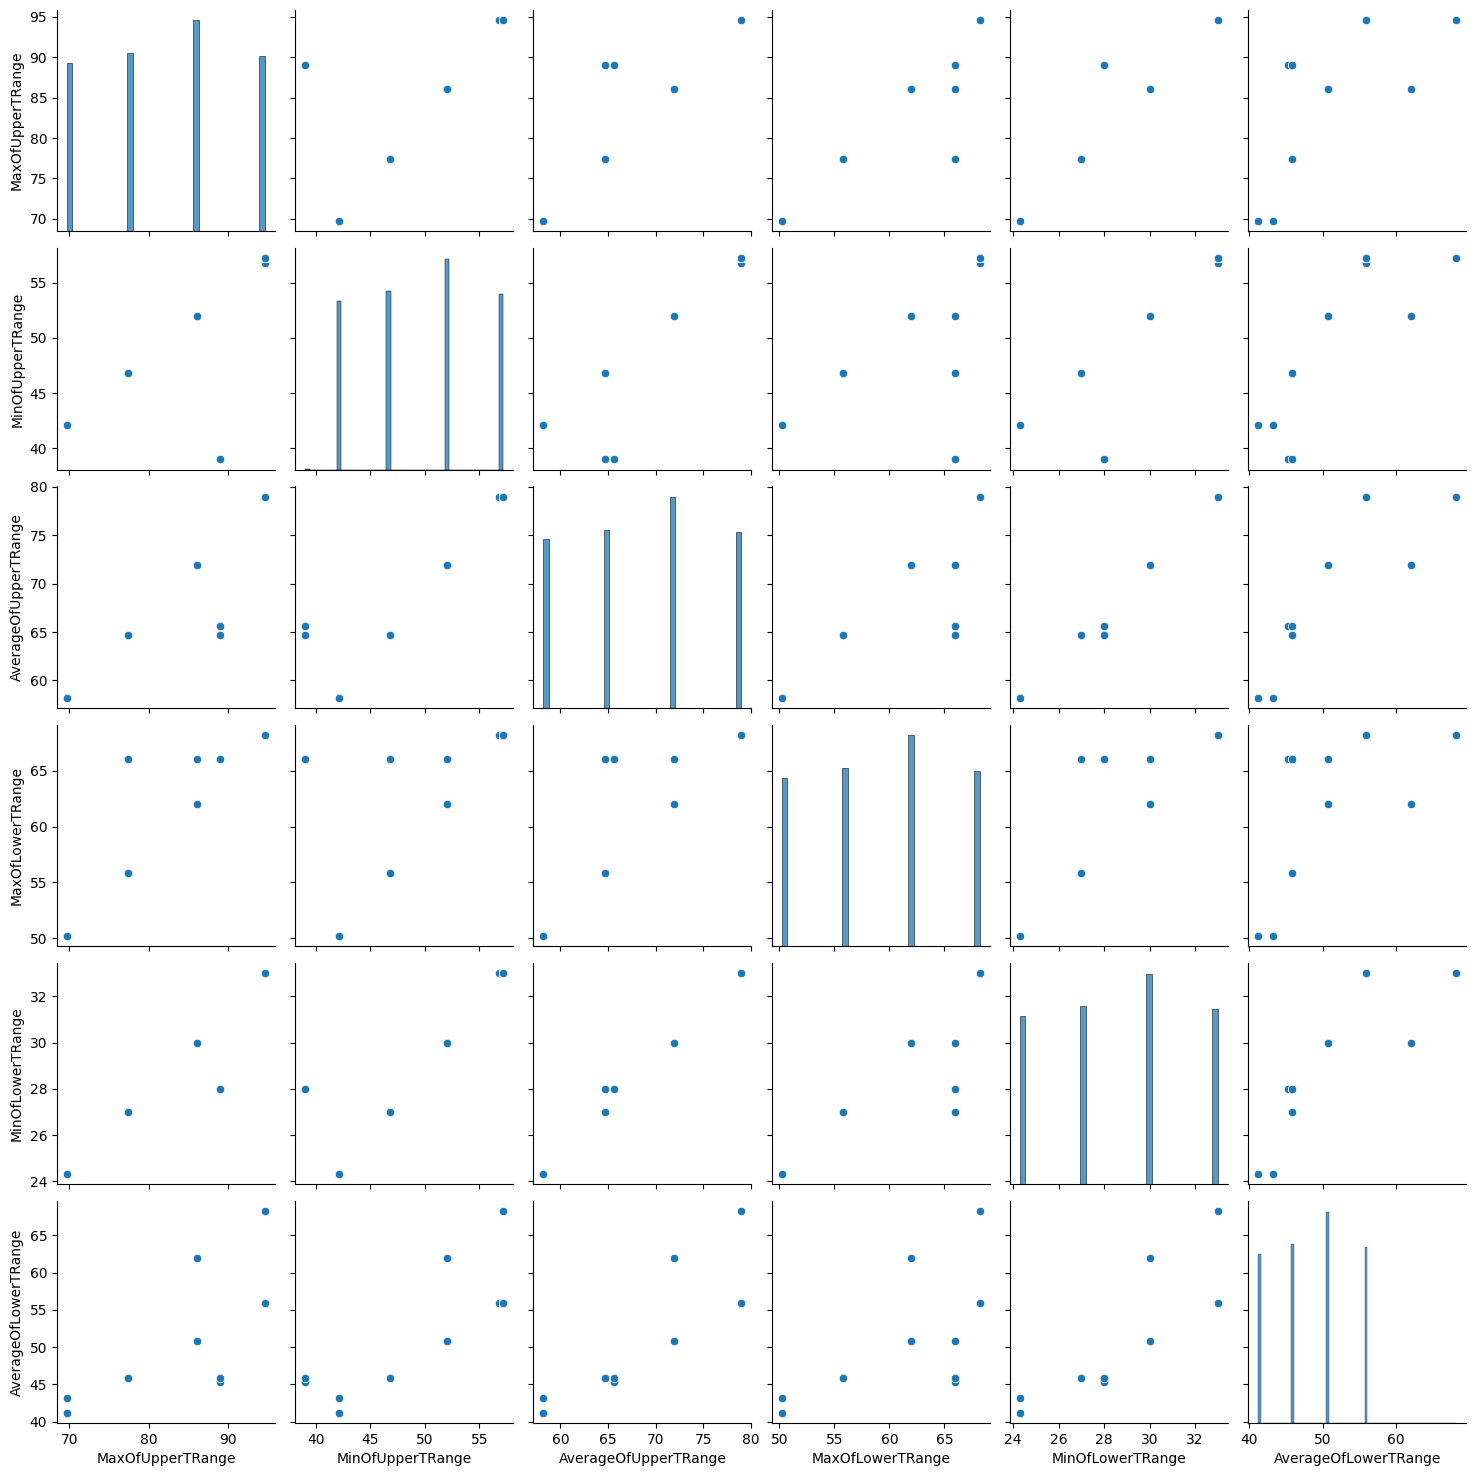

In [17]:
# Select the features you want to include in the pairplot
selected_features = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']

# Create pairplot for the selected features
sns.pairplot(df[selected_features])
plt.show()

In [18]:
corr = df[['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

corr = df[['MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

corr = df[['MaxOfLowerTRange','MaxOfUpperTRange', 'AverageOfLowerTRange', 'AverageOfUpperTRange']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Specify the columns to delete
columns_to_delete = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange']

# Delete the selected columns
df = df.drop(columns=columns_to_delete)
df_test = df_test.drop(columns=columns_to_delete)

# Display the updated DataFrame
print(df.shape)
df

Pearson correlation coefficient matrix of each variables:
                       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange
MaxOfUpperTRange              1.000000          0.999274              0.999844
MinOfUpperTRange              0.999274          1.000000              0.999770
AverageOfUpperTRange          0.999844          0.999770              1.000000
Pearson correlation coefficient matrix of each variables:
                       MaxOfLowerTRange  MinOfLowerTRange  AverageOfLowerTRange
MaxOfLowerTRange              1.000000          0.999753              0.999323
MinOfLowerTRange              0.999753          1.000000              0.999653
AverageOfLowerTRange          0.999323          0.999653              1.000000
Pearson correlation coefficient matrix of each variables:
                       MaxOfLowerTRange  MaxOfUpperTRange  \
MaxOfLowerTRange              1.000000          0.999897   
MaxOfUpperTRange              0.999897          1.000000   
AverageOfLo

Row#  clonesize  honeybee  bumbles  andrena  osmia  \
id                                                           
0      639.0       25.0      0.50     0.25     0.75   0.63   
1      124.0       12.5      0.25     0.25     0.25   0.25   
2      485.0       25.0      0.50     0.25     0.38   0.75   
3      324.0       12.5      0.25     0.25     0.75   0.75   
4      235.0       12.5      0.25     0.25     0.50   0.63   
...      ...        ...       ...      ...      ...    ...   
14995  258.0       12.5      0.25     0.25     0.50   0.63   
14996  256.0       12.5      0.25     0.25     0.38   0.63   
14997  324.0       12.5      0.25     0.25     0.75   0.50   
14998  691.0       25.0      0.50     0.38     0.38   0.75   
14999  253.0       12.5      0.25     0.25     0.50   0.75   

       AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  \
id                                                                       
0                      55.9         34.0                0.56  0.402948   
1                      45.8         34.0                0.56  0.500438   
2                      55.9         24.0                0.39  0.509001   
3                      55.9         16.0                0.26  0.583379   
4                      45.8         24.0                0.39  0.447669   
...                     ...          ...                 ...       ...   
14995                  41.2         34.0                0.56  0.335927   
14996                  45.8         34.0                0.56  0.545095   
14997                  45.8         16.0                0.26  0.481801   
14998                  50.8          1.0                0.10  0.552359   
14999                  50.8          1.0                0.10  0.523846   

       fruitmass      seeds       yield  
id                                       
0       0.409261  31.274591  4418.44126  
1       0.445494  34.467567  5862.80545  
2       0.459421  36.624966  6079.08526  
3       0.498056  40.865478  7400.77538  
4       0.423764  33.298861  4858.24073  
...          ...        ...         ...  
14995   0.352186  28.793440  3182.69865  
14996   0.470719  38.042756  5862.80545  
14997   0.442535  35.414082  5569.13925  
14998   0.470847  38.625436  6795.88187  
14999   0.464067  37.758138  6526.98819  

[15000 rows x 13 columns]

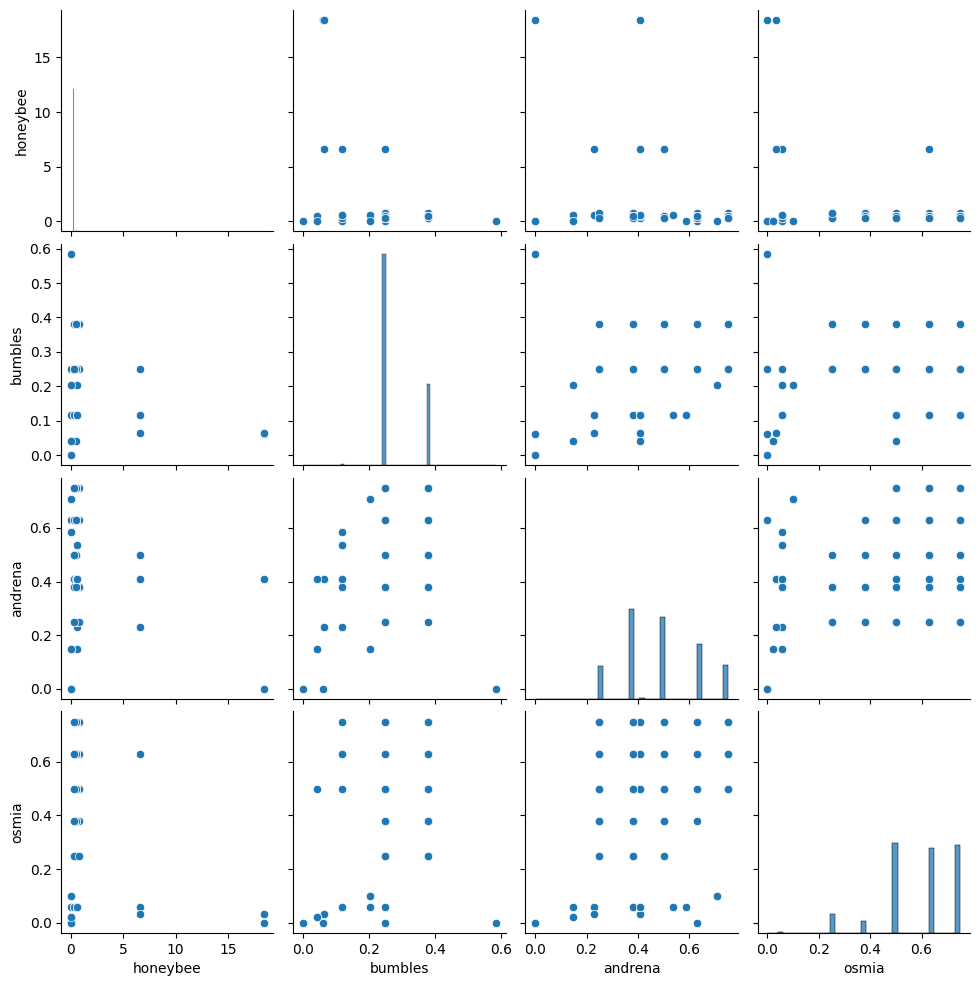

Pearson correlation coefficient matrix of each variables:
           honeybee   bumbles   andrena     osmia
honeybee  1.000000  0.017160  0.072043  0.037242
bumbles   0.017160  1.000000 -0.125969  0.171872
andrena   0.072043 -0.125969  1.000000  0.354582
osmia     0.037242  0.171872  0.354582  1.000000


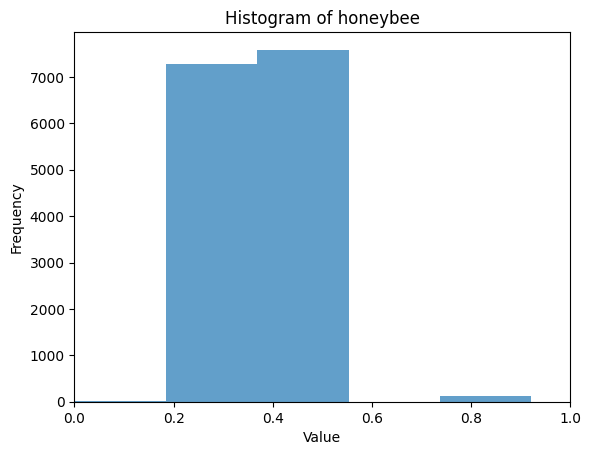

In [19]:
# Select the features you want to include in the pairplot
selected_features = ['honeybee', 'bumbles', 'andrena', 'osmia']

# Create pairplot for the selected features
sns.pairplot(df[selected_features])
plt.show()

corr = df[selected_features].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Plotting histogram for honeybee column
plt.hist(df['honeybee'], bins=100, alpha=0.7)
plt.title('Histogram of honeybee')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.show()

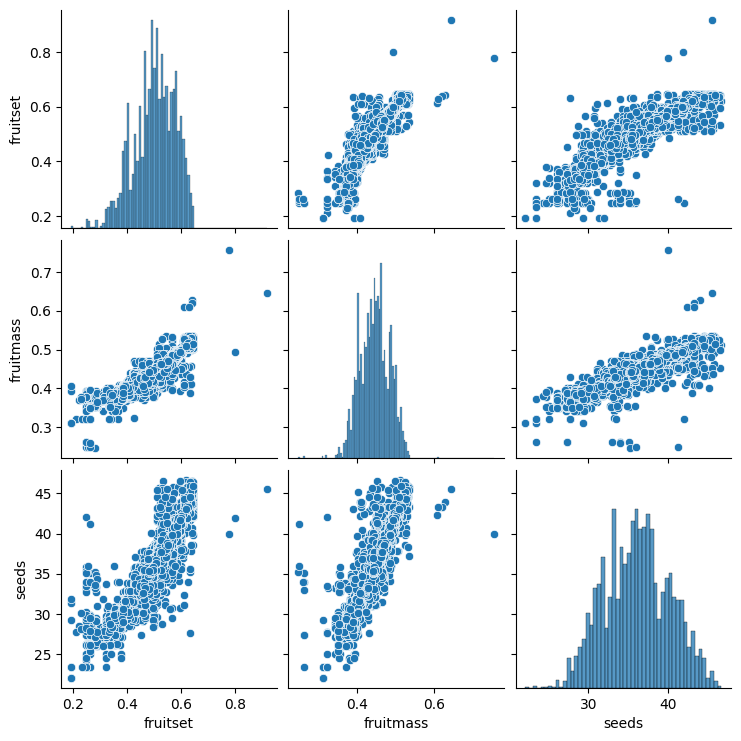

Pearson correlation coefficient matrix of each variables:
            fruitset  fruitmass     seeds
fruitset   1.000000   0.937357  0.947179
fruitmass  0.937357   1.000000  0.941995
seeds      0.947179   0.941995  1.000000


Row#  clonesize  honeybee  bumbles  andrena  osmia  \
id                                                           
0      639.0       25.0      0.50     0.25     0.75   0.63   
1      124.0       12.5      0.25     0.25     0.25   0.25   
2      485.0       25.0      0.50     0.25     0.38   0.75   
3      324.0       12.5      0.25     0.25     0.75   0.75   
4      235.0       12.5      0.25     0.25     0.50   0.63   
...      ...        ...       ...      ...      ...    ...   
14995  258.0       12.5      0.25     0.25     0.50   0.63   
14996  256.0       12.5      0.25     0.25     0.38   0.63   
14997  324.0       12.5      0.25     0.25     0.75   0.50   
14998  691.0       25.0      0.50     0.38     0.38   0.75   
14999  253.0       12.5      0.25     0.25     0.50   0.75   

       AverageOfLowerTRange  RainingDays  AverageRainingDays      seeds  \
id                                                                        
0                      55.9         34.0                0.56  31.274591   
1                      45.8         34.0                0.56  34.467567   
2                      55.9         24.0                0.39  36.624966   
3                      55.9         16.0                0.26  40.865478   
4                      45.8         24.0                0.39  33.298861   
...                     ...          ...                 ...        ...   
14995                  41.2         34.0                0.56  28.793440   
14996                  45.8         34.0                0.56  38.042756   
14997                  45.8         16.0                0.26  35.414082   
14998                  50.8          1.0                0.10  38.625436   
14999                  50.8          1.0                0.10  37.758138   

            yield  
id                 
0      4418.44126  
1      5862.80545  
2      6079.08526  
3      7400.77538  
4      4858.24073  
...           ...  
14995  3182.69865  
14996  5862.80545  
14997  5569.13925  
14998  6795.88187  
14999  6526.98819  

[15000 rows x 11 columns]

In [20]:
# Select the features you want to include in the pairplot
selected_features = ['fruitset', 'fruitmass', 'seeds']

# Create pairplot for the selected features
sns.pairplot(df[selected_features])
plt.show()

corr = df[selected_features].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

columns_to_delete = ['fruitset', 'fruitmass']

# Delete the selected columns
df = df.drop(columns=columns_to_delete)
df_test = df_test.drop(columns=columns_to_delete)
df

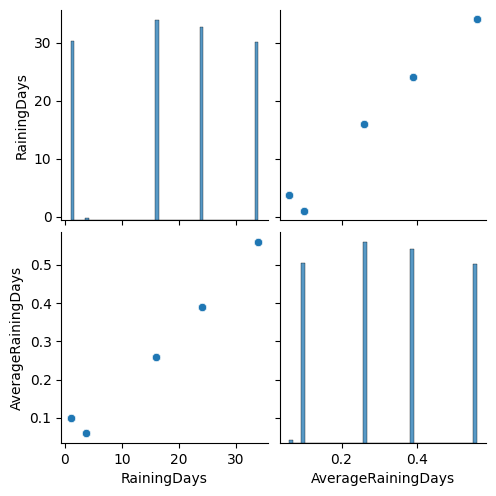

Pearson correlation coefficient matrix of each variables:
                     RainingDays  AverageRainingDays
RainingDays            1.000000            0.991722
AverageRainingDays     0.991722            1.000000


Row#  clonesize  honeybee  bumbles  andrena  osmia  \
id                                                           
0      639.0       25.0      0.50     0.25     0.75   0.63   
1      124.0       12.5      0.25     0.25     0.25   0.25   
2      485.0       25.0      0.50     0.25     0.38   0.75   
3      324.0       12.5      0.25     0.25     0.75   0.75   
4      235.0       12.5      0.25     0.25     0.50   0.63   
...      ...        ...       ...      ...      ...    ...   
14995  258.0       12.5      0.25     0.25     0.50   0.63   
14996  256.0       12.5      0.25     0.25     0.38   0.63   
14997  324.0       12.5      0.25     0.25     0.75   0.50   
14998  691.0       25.0      0.50     0.38     0.38   0.75   
14999  253.0       12.5      0.25     0.25     0.50   0.75   

       AverageOfLowerTRange  AverageRainingDays      seeds       yield  
id                                                                      
0                      55.9                0.56  31.274591  4418.44126  
1                      45.8                0.56  34.467567  5862.80545  
2                      55.9                0.39  36.624966  6079.08526  
3                      55.9                0.26  40.865478  7400.77538  
4                      45.8                0.39  33.298861  4858.24073  
...                     ...                 ...        ...         ...  
14995                  41.2                0.56  28.793440  3182.69865  
14996                  45.8                0.56  38.042756  5862.80545  
14997                  45.8                0.26  35.414082  5569.13925  
14998                  50.8                0.10  38.625436  6795.88187  
14999                  50.8                0.10  37.758138  6526.98819  

[15000 rows x 10 columns]

In [21]:
# Select the features you want to include in the pairplot
selected_features = ['RainingDays', 'AverageRainingDays']

# Create pairplot for the selected features
sns.pairplot(df[selected_features])
plt.show()

corr = df[selected_features].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

columns_to_delete = ['RainingDays',]

# Delete the selected columns
df = df.drop(columns=columns_to_delete)
df_test = df_test.drop(columns=columns_to_delete)
df

In [30]:

def gaussian_kernel(x1, x2, h):
    
    normalized_difference = (x1 - x2).astype(float) / h
    return np.exp(- (normalized_difference ** 2)/2) / np.sqrt(2 * np.pi)

def uniform_kernel(x1, x2, h):
    
    normalized_difference = (x1 - x2).astype(float) / h
    return (np.abs(normalized_difference)<1).astype(float)/2

def epanechnikov_kernel(x1, x2, h):

    normalized_difference = (x1 - x2).astype(float) / h
    return np.maximum(1-normalized_difference**2,0)*0.75

def shuffle_and_split(df, k):
    """
    Shuffle a DataFrame and split it into k datasets.

    Returns:
    list
        A list containing k DataFrames.
    """
    # Shuffle the DataFrame
    shuffled_df = df.sample(frac=1, random_state=4).reset_index(drop=True)
    
    # Split the DataFrame into k datasets
    split_dfs = np.array_split(shuffled_df, k)
    
    return split_dfs

def kernel_regression_multifeature(train_data, x, p, kernel, h):
    """
    Evaluate the value of estimated kernel regression function at a point x=(x1,x2,...xk) based on the training data ,
    specified kernel function ,bandwidth h and parameter p used to calculate distance between 2 points as 
    distance = (sum(xi_1-xi_2)**p)^1/p
    """
    
    dist = (np.transpose(train_data[:, :-1]) - x[:,None])
    dist_p = np.power(np.sum(dist**p, axis=0),float(1)/p) 

    k_x_xi=kernel(dist_p,0,h)
    sum1=np.sum(k_x_xi)

    k_x_xi_y=k_x_xi*train_data[:,-1]
    sum2=np.sum(k_x_xi_y)
    
    if(sum1==0): return 0
    return sum2/sum1

def calc_error_kernel(train_data, cv_data, kernel, h):

    """
    Evaluate the square error of kernel density function estimated using the training data on cv_data 
    """

    mae=0
    square_error=0

    for i in range(cv_data.shape[0]):
        est = kernel_regression_multifeature(train_data, cv_data[i][:-1], 2, kernel, h)
        mae+=np.abs(est-cv_data[i][-1])
        square_error+=(est-cv_data[i][-1])**2

    return mae

def calc_mae_kernel(data, kernel, h, k):

    """
    Evaluate the risk of kernel regression estimation using k-fold cross validation 
    Input :
    data - complete data
    kernel - gaussian/uniform/epanechnikov kernel
    h - bandwidth
    k - for k-fold cross validation
    """

    split_data=shuffle_and_split(data, k)
    total_error=0

    for i in range(k):
        # Concatenate test DataFrames into a single DataFrame
        combined_df = pd.concat([df for j, df in enumerate(split_data) if j != i] , ignore_index=True)

        # Convert the combined DataFrame to a NumPy array
        train_data = combined_df.to_numpy()
        test_data = split_data[i].to_numpy()
        
        total_error+=calc_error_kernel(train_data, test_data, kernel, h)

    return total_error/data.shape[0]

def train_multiple_regression(train_data):
    # MAKE X AND Y (CHECK SYNTAX)
    Y=train_data[:,-1]
    X=train_data[:,:-1]

    XtX=np.matmul(X.transpose(),X)
    XtY=np.matmul(X.transpose(),Y)
    B=np.matmul(np.linalg.inv(np.float64(XtX)),XtY)
    return B

def predict_multiple_regression(train_data, test_data): 
    X_test=test_data
    B=train_multiple_regression(train_data)
    return np.matmul(X_test, B)

def calc_mae_mixed(data, k, kernel, h):

    """
    Evaluate the risk of kernel regression estimation using k-fold cross validation 
    Input :
    data - complete data
    kernel - gaussian/uniform/epanechnikov kernel
    h - bandwidth
    k - for k-fold cross validation
    """

    split_data=shuffle_and_split(data, k)
    total_error=0

    for i in range(k):
        # Concatenate test DataFrames into a single DataFrame
        combined_df = pd.concat([df for j, df in enumerate(split_data) if j != i] , ignore_index=True)

        # Convert the combined DataFrame to a NumPy array
        train_data = combined_df.to_numpy()
        test_data = split_data[i].to_numpy()
        
        total_error+=calc_error_mixed(train_data, test_data, kernel, h)

    return total_error/data.shape[0]

def calc_error_mixed(train_data, cv_data, kernel, h):

    """
    Evaluate the square error of kernel density function estimated using the training data on cv_data 
    """
    mae=0

    pred1 = predict_multiple_regression(train_data, cv_data[:,:-1])
    pred2 = [kernel_regression_multifeature(train_data, cv_data[i][:-1], 2, kernel, h) for i in range(cv_data.shape[0])]
    pred2 = np.array(pred2)
    est= 0.95*pred1 + 0.05*pred2
    mae=np.sum(np.abs(est-cv_data[:,-1]))

    return mae

def calc_mae_regr(data, k):

    """
    Evaluate the risk of kernel regression estimation using k-fold cross validation 
    Input :
    data - complete data
    kernel - gaussian/uniform/epanechnikov kernel
    h - bandwidth
    k - for k-fold cross validation
    """

    split_data=shuffle_and_split(data, k)
    total_error=0

    for i in range(k):
        # Concatenate test DataFrames into a single DataFrame
        combined_df = pd.concat([df for j, df in enumerate(split_data) if j != i] , ignore_index=True)

        # Convert the combined DataFrame to a NumPy array
        train_data = combined_df.to_numpy()
        test_data = split_data[i].to_numpy()
        
        total_error+=calc_error_regr(train_data, test_data)

    return total_error/data.shape[0]

def calc_error_regr(train_data, cv_data):

    """
    Evaluate the square error of kernel density function estimated using the training data on cv_data 
    """
    mae=0

    pred1 = predict_multiple_regression(train_data, cv_data[:,:-1])
    mae=np.sum(np.abs(pred1-cv_data[:,-1]))

    return mae

def predict(kernel, h):

    with open("../sample_submission.csv", 'w') as f:
        f.write("id,yield\n")
        for i in range(10000):
            est = kernel_regression_multifeature(df.to_numpy(), df_test.to_numpy()[i][:], 2, kernel, h)
            j = i+15000
            f.write("{},{}\n".format(j,est))

def predict_regr():

    with open("../sample_submission.csv", 'w') as f:
        f.write("id,yield\n")
        required_features1= ['honeybee', 'seeds', 'RainingDays', 'clonesize', 'Row#', 'yield']
        required_features2= ['honeybee', 'seeds', 'RainingDays', 'clonesize', 'Row#']
        df1=df_new[required_features1]
        df2=df_test[required_features2]
        est = predict_multiple_regression(df1.to_numpy(), df2.to_numpy())
        for i in range(10000):
            j = i+15000
            f.write("{},{}\n".format(j,est[i]))

def predict(train_data, test_data, kernel, h, strategy,submit = False):

    with open("../sample_submission.csv", 'w') as f:
        f.write("id,yield\n")
        if(strategy==1):
            pred = predict_multiple_regression(df.to_numpy(), df_test.to_numpy())
        elif(strategy==2):
            for i in range(test_data.shape[0]):
                pred = kernel_regression_multifeature(train_data, test_data[i], 2, kernel, h)
        elif(strategy==3):
            pred1 = predict_multiple_regression(df.to_numpy(), df_test.to_numpy())
            for i in range(test_data.shape[0]):
                pred2 = kernel_regression_multifeature(train_data, test_data[i], 2, kernel, h)
            pred= 0.6*pred1 + 0.4*pred2
        else:
            pass
        if(submit):
            for i in range(pred.shape()[0]):
                j = i+15000
                f.write("{},{}\n".format(j,pred[i]))

def calc_mae(y_pred, y):
    return np.average(np.abs(y_pred-y))

In [23]:
# for i in range(10):
#     print(float(i/10),calc_mae_kernel(df, gaussian_kernel, float(i/10), 3))
# for i in range(10):
#     print(float(1+i/10),calc_mae_kernel(df, gaussian_kernel, float(1+i/10), 3))
# predict(gaussian_kernel, 1.4)  #407

In [57]:

required_features= ['seeds', 'bumbles','andrena', 'MaxOfUpperTRange', 'RainingDays', 'clonesize', 'Row#', 'fruitset', 'fruitmass', 'yield']

print(calc_mae_regr(df_new[required_features], 5))

predict_regr()

303.78350705626053
